<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/answer/10a_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第10章 アンサンブル学習

## 課題

アンサンブル学習でbostonデータの回帰を行い、各特徴の重要性を確認してください。

ライブラリの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import ensemble
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

bostonデータを読み込んでX, yに格納後、概要を表示します。

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## バギング

In [3]:
reg1 = ensemble.BaggingRegressor()
reg1.fit(X, y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

一つ抜き法で評価します。

In [4]:
cv = LeaveOneOut()
scores = cross_val_score(reg1, X, y, cv=cv, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-10.41


## ランダムフォレスト

In [5]:
reg2 = ensemble.RandomForestRegressor(n_estimators=10)
reg2.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
scores = cross_val_score(reg2, X, y, cv=cv, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-11.87


## Adaブースト

In [7]:
reg3 = ensemble.AdaBoostRegressor()
reg3.fit(X,y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [8]:
scores = cross_val_score(reg3, X, y, cv=cv, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-13.32


## 勾配ブースティング

In [9]:
reg4 = ensemble.GradientBoostingRegressor()
reg4.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
scores = cross_val_score(reg4, X, y, cv=cv, scoring='neg_mean_squared_error')
print("{0:4.2f}".format(scores.mean()))

-8.60


各特徴の重要性を確認するコード

Feature ranking:
1. RM (0.410809)
2. LSTAT (0.372392)
3. DIS (0.085042)
4. NOX (0.036359)
5. PTRATIO (0.034881)
6. CRIM (0.023462)
7. B (0.012111)
8. TAX (0.011342)
9. AGE (0.008765)
10. INDUS (0.002368)
11. RAD (0.001249)
12. CHAS (0.000873)
13. ZN (0.000348)


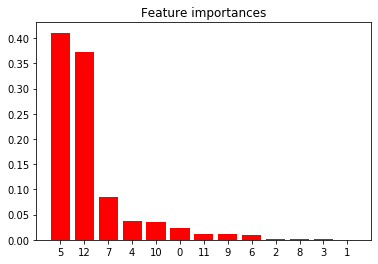

In [11]:
importances = reg4.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, boston.feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

評価値は二乗誤差の平均の反数なので、0に近いほどよいことになります。